In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_agg = agg_clustering.fit_predict(X_scaled)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

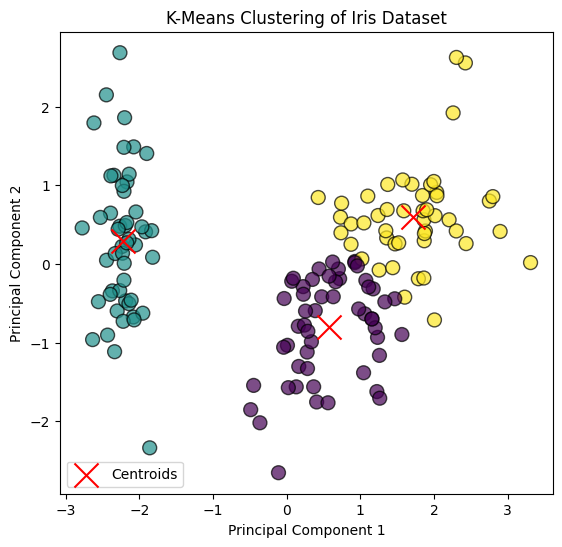

In [7]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
            pca.transform(kmeans.cluster_centers_)[:, 1],
            s=300, c='red', label='Centroids', marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()

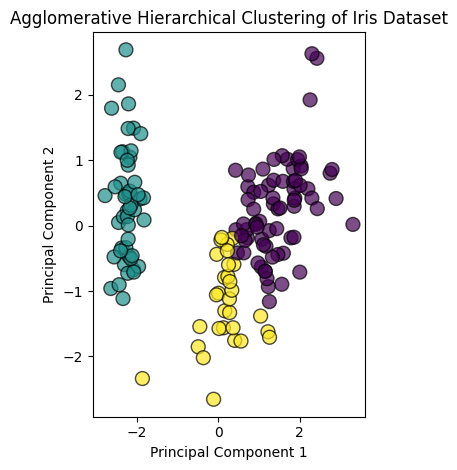

In [8]:
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_agg, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Hierarchical Clustering of Iris Dataset')

plt.tight_layout()

In [9]:
silhouette_kmeans = silhouette_score(X_scaled, y_kmeans)
silhouette_agg = silhouette_score(X_scaled, y_agg)

In [10]:
print(f'Silhouette Score for K-Means: {silhouette_kmeans:.4f}')
print(f'Silhouette Score for Agglomerative Hierarchical Clustering: {silhouette_agg:.4f}')

Silhouette Score for K-Means: 0.4599
Silhouette Score for Agglomerative Hierarchical Clustering: 0.4467
